<a href="https://colab.research.google.com/github/Mmbsaksd/Customer-segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

> Indented block



### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

#**Feature Engineering**

##**Importing**

In [ ]:
#Importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the datasets
df = pd.read_csv('/content/Online Retail.xlsx - Online Retail.csv')


##**Data Inspection**

In [ ]:
#First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#Checking shape
df.shape

(541909, 8)

In [ ]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


##**Handling Missing Data**

In [ ]:
from pandas.core import missing
#Missing value count Function
def show_missing():
  missing = df.columns[df.isnull().any()].tolist()
  return missing

#Missing data count and percentage
print("Missing Data Count")
print(df[show_missing()].isnull().sum().sort_values(ascending=False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending=False)/len(df)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


In [ ]:
#Handling the missing values
#Customer id is irrelavant so dropping
#df.drop.('CustomerID', axis=1, inplace=True)

#Description cant be imputed by mesuare of tendancy
#So dropping null value row
df.dropna(inplace=True)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Reconfirmation on null value
df.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

##**Removing Cancelled Rows**

In [ ]:
#Converting invoice number columns into str
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

#Remove row which are cancelled
df = df[~df['InvoiceNo'].str.contains('C')]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


##**Date Columns Split**

In [ ]:
#Extracting element from invoice date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['WeekDay'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].apply(lambda x: x.day)
df['Year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['Hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['Minute'] = df['InvoiceDate'].apply(lambda x: x.minute)


In [ ]:
#Create total amount columns
df['Total_Amount'] = df['Quantity']*df['UnitPrice']

#DataFrame Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397924 non-null  object        
 1   StockCode     397924 non-null  object        
 2   Description   397924 non-null  object        
 3   Quantity      397924 non-null  int64         
 4   InvoiceDate   397924 non-null  datetime64[ns]
 5   UnitPrice     397924 non-null  float64       
 6   CustomerID    397924 non-null  float64       
 7   Country       397924 non-null  object        
 8   WeekDay       397924 non-null  object        
 9   Month         397924 non-null  object        
 10  Day           397924 non-null  int64         
 11  Year          397924 non-null  int64         
 12  Hour          397924 non-null  int64         
 13  Minute        397924 non-null  int64         
 14  Total_Amount  397924 non-null  float64       
dtypes: datetime64[ns]

#**Explorative Data Analysis(EDA)**

In [ ]:
#Checking the statistical discribtion
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total_Amount
count,397924,397924,397924,397924.000000,397924,397924.000000,397924.000000,397924,397924,397924,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
unique,18536,3665,3877,NaN,17286,NaN,NaN,37,6,12,NaN,NaN,NaN,NaN,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom,Thursday,November,NaN,NaN,NaN,NaN,NaN
freq,542,2035,2028,NaN,542,NaN,NaN,354345,80052,64545,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.021823,NaN,3.116174,15294.315171,NaN,NaN,NaN,15.042181,2010.934259,12.728247,30.408013,22.394749
std,NaN,NaN,NaN,180.420210,NaN,22.096788,1713.169877,NaN,NaN,NaN,8.653771,0.247829,2.273535,17.078163,309.055588
min,NaN,NaN,NaN,1.000000,NaN,0.000000,12346.000000,NaN,NaN,NaN,1.000000,2010.000000,6.000000,0.000000,0.000000
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13969.000000,NaN,NaN,NaN,7.000000,2011.000000,11.000000,16.000000,4.680000


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'WeekDay', 'Month', 'Day', 'Year',
       'Hour', 'Minute', 'Total_Amount'],
      dtype='object')

In [ ]:
#Creating DataFrame on description and count
Description_df = df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index':'Description_Name'},inplace=True)
Description_df.rename(columns={'Description':'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


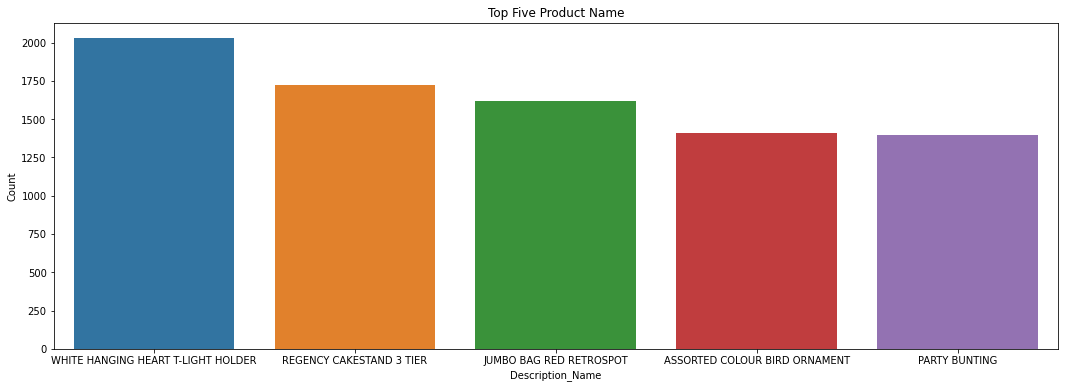

In [ ]:
#Plotting on barplot
plt.figure(figsize=(18,6))
plt.title('Top Five Product Name')
sns.barplot(x='Description_Name',y='Count', data=Description_df[:5])

**Top Five product based on selling**


1.   Whit Hanging Heart Light Holder
2.   Regency Cake Stand 3 Tier
3.   Jumbo Bang Red Retrospect
4.   Assorted Colour Bird Arangment
5.   Party Bunting

In [ ]:
#Printing last five rows
Description_df.tail()

,Description_Name,Count
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


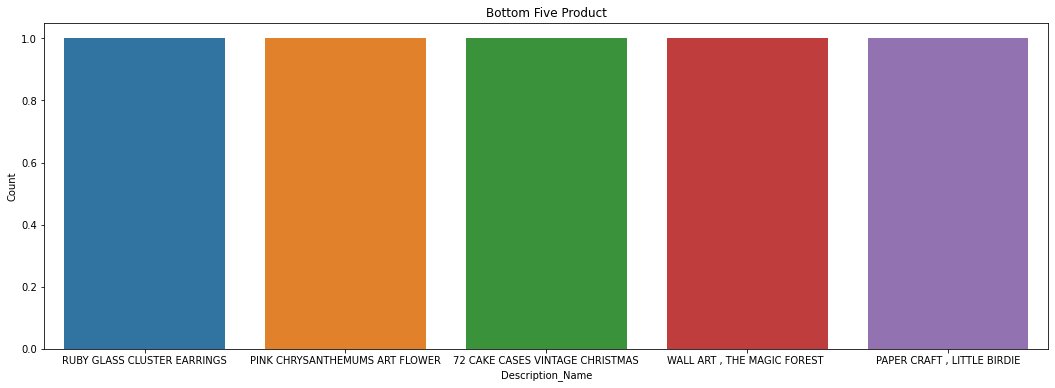

In [ ]:
#Plotting bottom five Product Based On Selling
plt.figure(figsize=(18,6))
plt.title('Bottom Five Product')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])

**Bottom Five Product**

1.   Ruby GlassCluster Earning
2.   Pink Chrysanthemums Art Flower
3.   Cake Case Vintage Christmas
4    Wall Art The Magic Forest
5.   Paper Craft Little Birdie



In [ ]:
#Creating the table of stock distribution
Stockcode_df = df['StockCode'].value_counts().reset_index()
Stockcode_df.rename(columns={'index':'StockCode_Name'},inplace=True)
Stockcode_df.rename(columns={'StockCode':'Count'},inplace=True)
Stockcode_df.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


In [ ]:
#Printing Bottom Five rows
Stockcode_df.tail()

,StockCode_Name,Count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


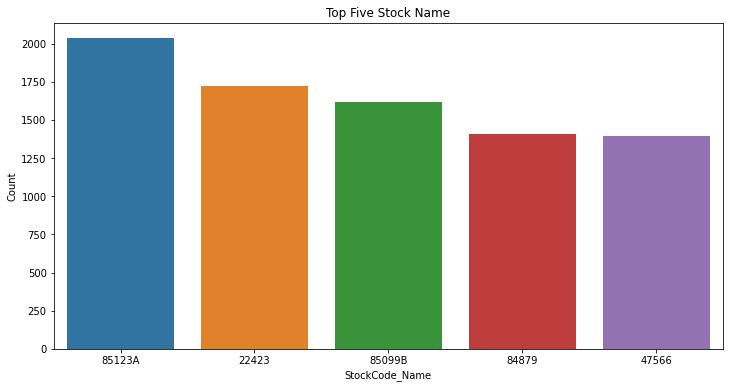

In [ ]:
#Plotting Top Five Stock
plt.figure(figsize=(12,6))
plt.title('Top Five Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stockcode_df[:5])

**Top Five Stock Name**


1.   85123A
2.   22423
3.   85099B
4.   83879
5.   47566


In [ ]:
#List of bottom 5 stockcode name
Stockcode_df.tail()

,StockCode_Name,Count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


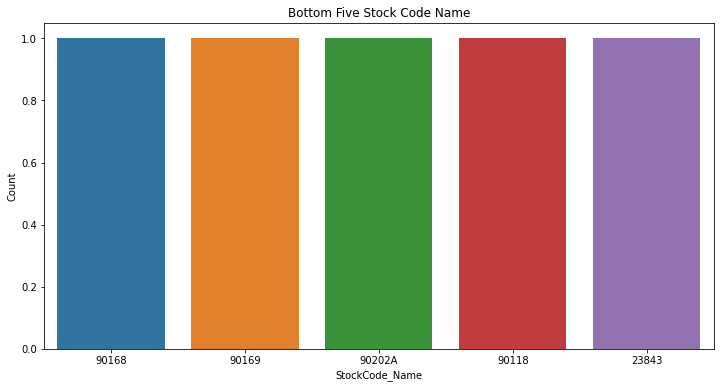

In [ ]:
#Plotting bottom five stockcode name
plt.figure(figsize=(12,6))
plt.title('Bottom Five Stock Code Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stockcode_df[-5:])

In [ ]:
#Creating the table of countribution with its distribution
country_df = df['Country'].value_counts().reset_index()
country_df.rename(columns={'index':'Country_Name'},inplace=True)
country_df.rename(columns={'Country':'Count'},inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


In [ ]:
#Print tail of countries distribution
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


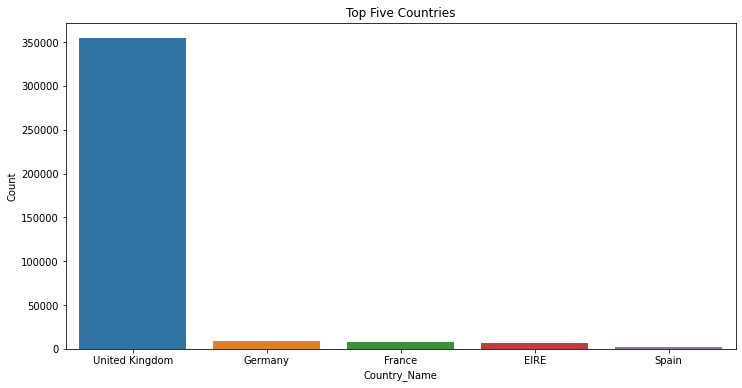

In [ ]:
#Ploting top five countries
plt.figure(figsize=(12,6))
plt.title('Top Five Countries')
sns.barplot(x='Country_Name', y='Count',data=country_df[:5] )

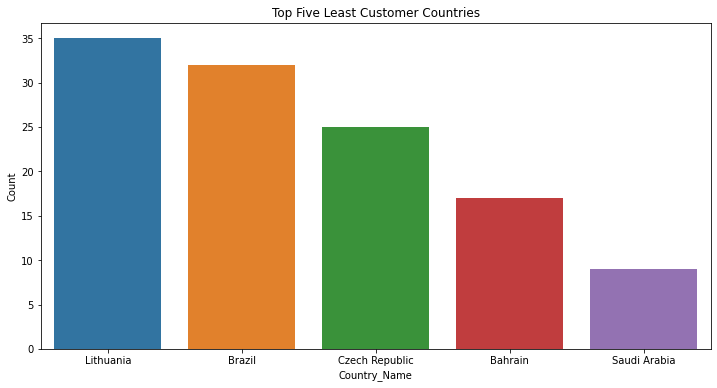

In [ ]:
#Plotting top least customer countries
plt.figure(figsize=(12,6))
plt.title('Top Five Least Customer Countries')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

**Observation On Countries Distribution**

*   Most customer are belong to UK, then Germany, France, EIFE and Spain respectively
*   Least customer company are Greece, United Arab Emirate, Austria, Israel and Soudia Arabia


In [ ]:
#Checking customer of soudia arabia
df[df['Country']=='Saudi Arabia']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total_Amount
100810,544838,22915,ASSORTED BOTTLE TOP MAGNETS,12,2011-02-24 10:34:00,0.42,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,5.04
100811,544838,22363,GLASS JAR MARMALADE,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,17.70
100812,544838,22362,GLASS JAR PEACOCK BATH SALTS,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,17.70
100813,544838,22361,GLASS JAR DAISY FRESH COTTON WOOL,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,17.70
100814,544838,22553,PLASTERS IN TIN SKULLS,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,19.80
100815,544838,22555,PLASTERS IN TIN STRONGMAN,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,19.80
100816,544838,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,19.80
100817,544838,20781,GOLD EAR MUFF HEADPHONES,2,2011-02-24 10:34:00,5.49,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,10.98
100818,544838,22969,HOMEMADE JAM SCENTED CANDLES,12,2011-02-24 10:34:00,1.45,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,17.40


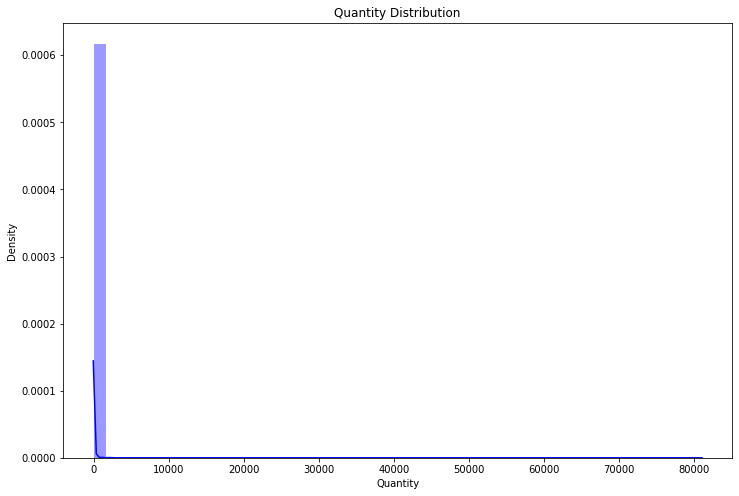

In [ ]:
#Plotting Distribution of Quantity
plt.figure(figsize=(12,8))
plt.title("Quantity Distribution")
sns.distplot(df['Quantity'],color="B")

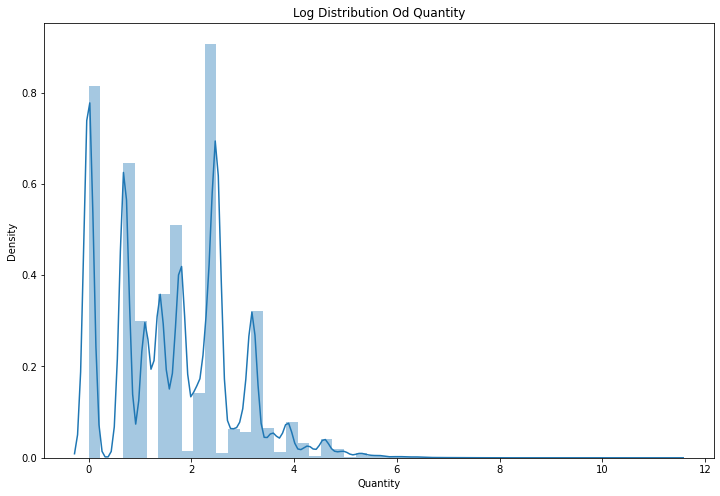

In [ ]:
#Distribution Of Quantity with log
plt.figure(figsize=(12,8))
plt.title('Log Distribution Od Quantity')
sns.distplot(np.log(df['Quantity']))

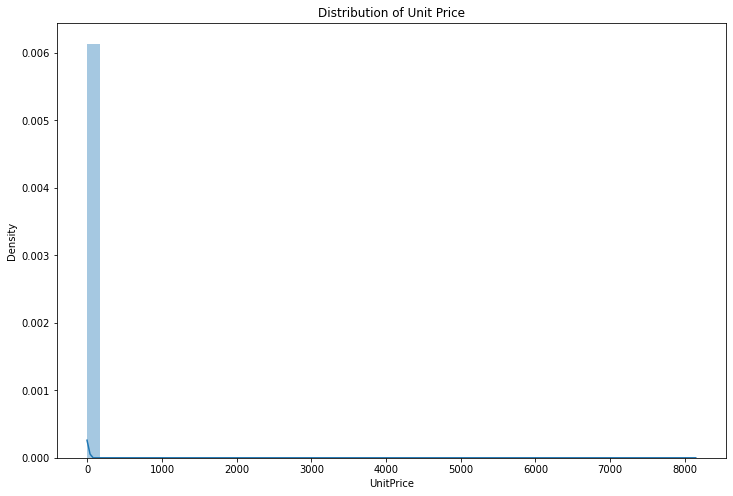

In [ ]:
#Checking the disatribution of unitprice
plt.figure(figsize=(12,8))
plt.title('Distribution of Unit Price')
sns.distplot(df['UnitPrice'])

In [ ]:
#Checking the dispersion of price unit
df['UnitPrice'].describe([0.75,0.90,0.95,0.99])

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
50%           1.950000
75%           3.750000
90%           6.350000
95%           8.500000
99%          14.950000
max        8142.750000
Name: UnitPrice, dtype: float64

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'WeekDay', 'Month', 'Day', 'Year',
       'Hour', 'Minute', 'Total_Amount'],
      dtype='object')

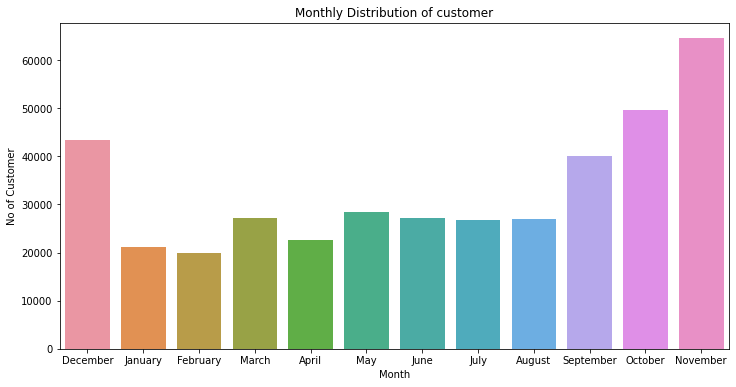

In [ ]:
#Plotting the distribution on monthly basis
plt.figure(figsize=(12,6))
sns.countplot(x='Month', data=df)
plt.title("Monthly Distribution of customer")
plt.xlabel('Month')
plt.ylabel("No of Customer")
plt.show()

Text(0.5, 0, 'Week Name')

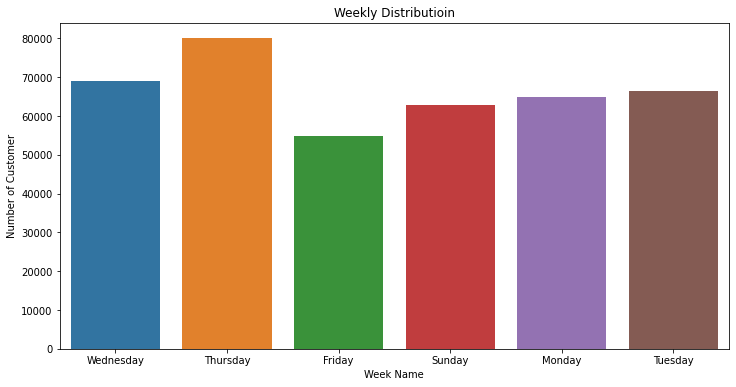

In [ ]:
#Plotting the distribution of weeks
plt.figure(figsize=(12,6))
plt.title('Weekly Distributioin')
sns.countplot(x='WeekDay', data=df)
plt.ylabel('Number of Customer')
plt.xlabel('Week Name')

Text(0, 0.5, 'No of Hours')

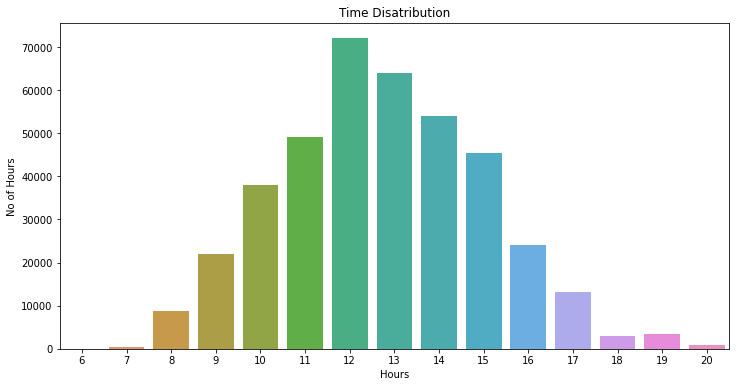

In [ ]:
#Plotting time distribution
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df)
plt.title('Time Disatribution')
plt.xlabel('Hours')
plt.ylabel("No of Hours")

#**Model Building**

##**Model Preprocessing**

In [ ]:
#Importing kmean and required evaluation metrics
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34


In [ ]:
import datetime as dt

#Create last date
last_date = dt.datetime(2011,12,31)

#Feature mining
x_features = df.groupby("CustomerID").agg({'InvoiceDate':lambda x:(last_date-x.max()).days,'InvoiceNo':lambda x:len(x),'Total_Amount': lambda x:x.sum()})

#Rename the columns
x_features.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency', 'Total_Amount':'Monetary' }, inplace=True)

x_features = x_features[x_features['Monetary']>0]
x_features.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,346,1,77183.60
12347.0,23,182,4310.00
12348.0,96,31,1797.24
12349.0,39,73,1757.55
12350.0,331,17,334.40


In [ ]:
import math
rfm_df = x_features


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int64  
 1   Frequency  4338 non-null   int64  
 2   Monetary   4338 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


In [ ]:
#Log conversion
import math
rfm_df = x_features
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [ ]:
rfm_df.describe()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,113.059474,91.729599,2054.266460,4.362202,3.679942,6.590782
std,100.012264,228.815081,8989.230441,0.852556,1.325919,1.260895
min,21.000000,1.000000,3.750000,3.044522,0.000000,1.321756
25%,38.000000,17.000000,307.415000,3.637586,2.833213,5.728199
50%,71.000000,41.000000,674.485000,4.262680,3.713572,6.513949
75%,162.750000,100.000000,1661.740000,5.092212,4.605170,7.415621
max,394.000000,7847.000000,280206.020000,5.976351,8.967887,12.543280


In [ ]:
#Scaling the datas
scal_featues = StandardScaler()
x = scal_featues.fit_transform(rfm_df)
ran_n_cl = [2,3,4,5,6,7,8,9,10,11,12, 13, 14, 15,16,17,18]

##**KMeans**

In [ ]:
#Preprocessing for k in kmeans
from sklearn.cluster import KMeans
for n_clusters in ran_n_cl:
  kmeans_clust = KMeans(n_clusters = n_clusters)
  pred = kmeans_clust.fit_predict(x)
  centers = kmeans_clust.cluster_centers_

  score = calinski_harabasz_score(x,pred)
  print("For n_clusters ={}, calinski harabasz score is {}".format(n_clusters,score))

For n_clusters =2, calinski harabasz score is 2125.035727730013
For n_clusters =3, calinski harabasz score is 2065.6321397213414
For n_clusters =4, calinski harabasz score is 2274.6635063637777
For n_clusters =5, calinski harabasz score is 2175.5806190005433
For n_clusters =6, calinski harabasz score is 2184.944649845007
For n_clusters =7, calinski harabasz score is 2181.7083713806587
For n_clusters =8, calinski harabasz score is 2156.9138584818284
For n_clusters =9, calinski harabasz score is 2123.079420627909
For n_clusters =10, calinski harabasz score is 2092.1618174688615
For n_clusters =11, calinski harabasz score is 2043.531918755477
For n_clusters =12, calinski harabasz score is 1988.9931641116498
For n_clusters =13, calinski harabasz score is 1943.916744428172
For n_clusters =14, calinski harabasz score is 1915.692175155543
For n_clusters =15, calinski harabasz score is 1901.0310828212203
For n_clusters =16, calinski harabasz score is 1855.2808151686584
For n_clusters =17, cali

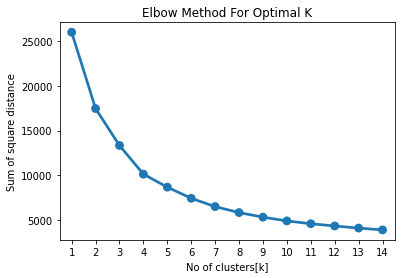

In [ ]:
#Plotting Elbow chart
sum_sq_dt = {}
for k in range(1,15):
  km = KMeans(n_clusters= k, init='k-means++', max_iter=1000)
  km = km.fit(x)
  sum_sq_dt[k] = km.inertia_

sns.pointplot(x=list(sum_sq_dt.keys()),y=list(sum_sq_dt.values()))
plt.title("Elbow Method For Optimal K")
plt.xlabel('No of clusters[k]')
plt.ylabel("Sum of square distance")
plt.show()

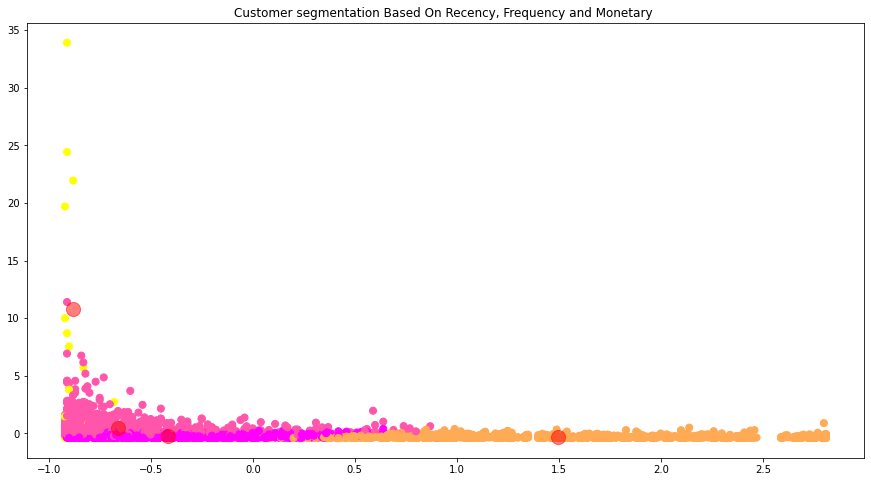

In [ ]:
#Implimenting kmeans with optimized k value
kmeans = KMeans(n_clusters=4, init='k-means++',max_iter=1000)
y_kmeans = kmeans.fit_predict(x)

#Plotting revised k value model
plt.figure(figsize=(15,8))
plt.title('Customer segmentation Based On Recency, Frequency and Monetary ')
plt.scatter(x[:,0], x[:,1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5)

In [ ]:
#Initializing cluster columns
kmean = x_features
kmean['Customer_Cluster'] = kmeans.labels_
kmean.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Customer_Cluster
CustomerID,,,,,,,
12346.0,346,1,77183.60,5.846439,0.000000,11.253942,2
12347.0,23,182,4310.00,3.135494,5.204007,8.368693,1
12348.0,96,31,1797.24,4.564348,3.433987,7.494007,0
12349.0,39,73,1757.55,3.663562,4.290459,7.471676,1
12350.0,331,17,334.40,5.802118,2.833213,5.812338,2


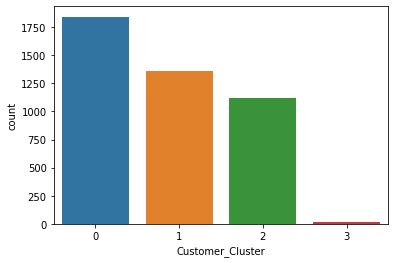

In [ ]:
#Plotting the customer segment by k means
sns.countplot(x_features['Customer_Cluster'])

In [ ]:
customer = pd.DataFrame(x_features.Customer_Cluster)
pd.DataFrame(customer.value_counts())

,0
Customer_Cluster,
0,1842
1,1360
2,1123
3,13


In [ ]:
#Model Evaluation of KMeans
labels = kmeans.labels_
print('Intertia at K =', 5, ':', kmeans.inertia_)
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(x, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(x, labels))
print("---------------------------------------------------------------")

Intertia at K = 5 : 10109.838868392533
Calinski-Harabasz Index: 2274.698
Davies-Bouldin Index: 0.944
---------------------------------------------------------------


##**DBSCAN**

In [ ]:
#Implimenting the DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5).fit(x)
label = dbscan.labels_

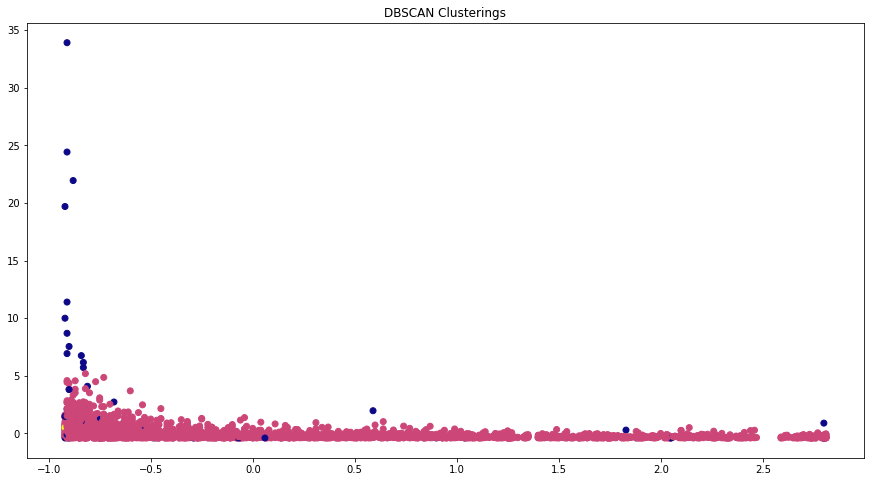

In [ ]:
#Plot Cluster
plt.figure(figsize=(15,8))
plt.scatter(x[:,0], x[:,1], c=label, cmap="plasma")
plt.title("DBSCAN Clusterings")
plt.show()

In [ ]:
#Assigning cluster on columns
dbs = x_features
dbs['Customer_Cluster'] = dbscan.labels_
dbs.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Customer_Cluster
CustomerID,,,,,,,
12346.0,346,1,77183.60,5.846439,0.000000,11.253942,-1
12347.0,23,182,4310.00,3.135494,5.204007,8.368693,0
12348.0,96,31,1797.24,4.564348,3.433987,7.494007,0
12349.0,39,73,1757.55,3.663562,4.290459,7.471676,0
12350.0,331,17,334.40,5.802118,2.833213,5.812338,0


Text(0.5, 0, 'Cluster')

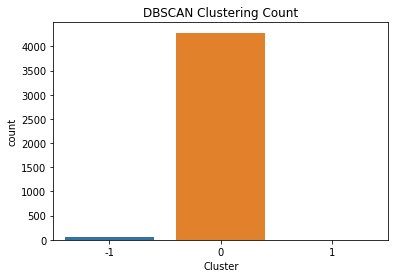

In [73]:
#Plotting the customer segment by k means
sns.countplot(label)
plt.title("DBSCAN Clustering Count")
plt.xlabel("Cluster")

In [ ]:
#Model Evaluation of KMeans
labels = dbscan.labels_
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(x, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(x, labels))
print("---------------------------------------------------------------")

Calinski-Harabasz Index: 256.499
Davies-Bouldin Index: 1.909
---------------------------------------------------------------


##**Hierarchial Clusterings**

<function matplotlib.pyplot.show>

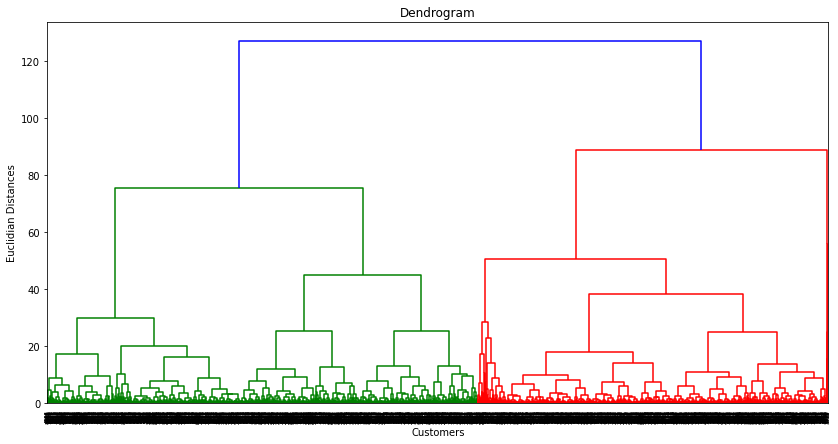

In [ ]:
#Finding optimal number of cluster by Dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(14,7))
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title("Dendrogram")
plt.xlabel('Customers')
plt.ylabel('Euclidian Distances')
plt.show

In [ ]:
#Fitting the hierarchial clustering into datasets
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hcm = hc.fit(x)
y_pred = hc.fit_predict(x)

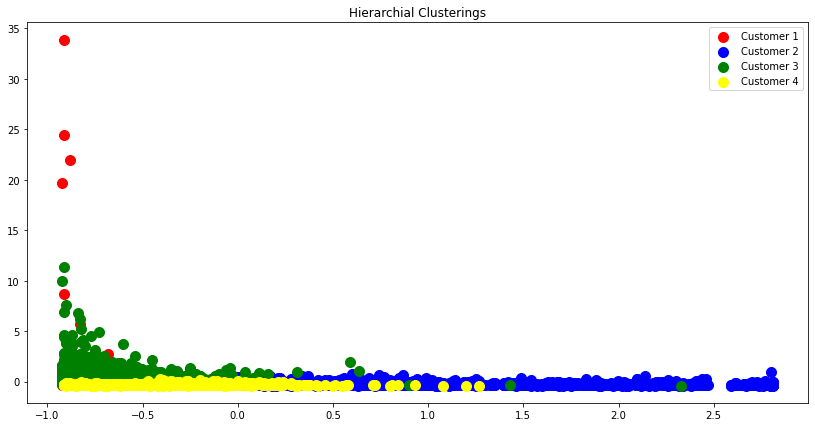

In [82]:
#Plottring the clustering on hierarchial clustering
plt.figure(figsize=(14,7))
plt.scatter(x[y_pred == 0,0], x[y_pred== 0,1], s = 100, c= 'red', label = 'Customer 1')
plt.scatter(x[y_pred == 1,0], x[y_pred== 1,1], s = 100, c= 'blue', label = 'Customer 2')
plt.scatter(x[y_pred == 2,0], x[y_pred== 2,1], s = 100, c= 'green', label = 'Customer 3')
plt.scatter(x[y_pred == 3,0], x[y_pred== 3,1], s = 100, c= 'yellow', label = 'Customer 4')

plt.title('Hierarchial Clusterings')
plt.legend()
plt.show()

Text(0.5, 0, 'Cluster')

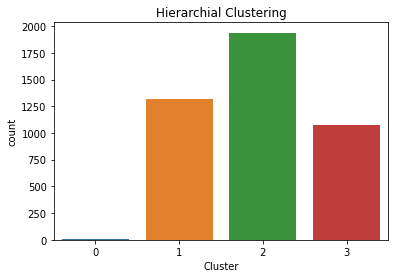

In [74]:
#Hierarchial Clusterings
sns.countplot(hc.labels_)
plt.title("Hierarchial Clustering")
plt.xlabel("Cluster")

In [70]:
#Assigining the respective cluster 
hcc = x_features
hcc['Customer_Cluster'] = hc.labels_
hcc.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Customer_Cluster
CustomerID,,,,,,,
12346.0,346,1,77183.60,5.846439,0.000000,11.253942,2
12347.0,23,182,4310.00,3.135494,5.204007,8.368693,2
12348.0,96,31,1797.24,4.564348,3.433987,7.494007,3
12349.0,39,73,1757.55,3.663562,4.290459,7.471676,2
12350.0,331,17,334.40,5.802118,2.833213,5.812338,1


In [69]:
#Model Evaluation
labels = hc.labels_
print("Calinski-Harabasz Index: %0.3f"% calinski_harabasz_score(x,labels))
print("Davies-Bouldin Index: %0.3f" %davies_bouldin_score(x, labels))

Calinski-Harabasz Index: 1923.729
Davies-Bouldin Index: 1.003


#**Result Summery**

In [84]:
from prettytable import PrettyTable

#Initilizing the name of the columns
myTable = PrettyTable(['SL NO','Model Name',"Data",'Optimal Number of Cluster','Calinski-Harabasz Score','Davies-Bouldin Score'])

#Adding the rows to table
myTable.title = "Result Summery"
myTable.add_row(['1','KMeans Clusterings','RFM','4','2274.698','0.944'])
myTable.add_row(['2', 'DBSCAN Clusterings','RFM','3','256.499','1.909'])
myTable.add_row(['3','Hierarchical Clusterings','RFM','4','1923.729','1.003'])

#Printing Tables
print(myTable)

+----------------------------------------------------------------------------------------------------------------------+
|                                                    Result Summery                                                    |
+-------+--------------------------+------+---------------------------+-------------------------+----------------------+
| SL NO |        Model Name        | Data | Optimal Number of Cluster | Calinski-Harabasz Score | Davies-Bouldin Score |
+-------+--------------------------+------+---------------------------+-------------------------+----------------------+
|   1   |    KMeans Clusterings    | RFM  |             4             |         2274.698        |        0.944         |
|   2   |    DBSCAN Clusterings    | RFM  |             3             |         256.499         |        1.909         |
|   3   | Hierarchical Clusterings | RFM  |             4             |         1923.729        |        1.003         |
+-------+-----------------------